# Part 1 - Warm-up

### Task 1
The first task consists of fitting the following logarithmic equation to a set of 50 (x,y) data points:

$$y = a * \log{(x)} + b$$

Your curve should be optimal with respect to the residual sum of squares metric (RSS). Perform the following steps

- Load and plot the data
- Define a new variable log(x) and transform the data.
- Fit a model to the new data
- Plot the logarithmic curve against the original data (see plot above).
- Compute the RSS and $R^2$ measures.
- Discuss the results, is it a good $R^2$ score?

In [85]:
# import libraries 
import pandas as pd 
import numpy as np 
import numpy.polynomial.polynomial as poly 
import matplotlib.pyplot as plt 
%matplotlib inline

In [86]:
# load data
df = pd.read_csv("p3_task-1.csv")
df.head()

,x,y
0,10.529,39.105
1,10.799,40.584
2,11.698,39.883
3,12.851,39.411
4,13.565,40.760


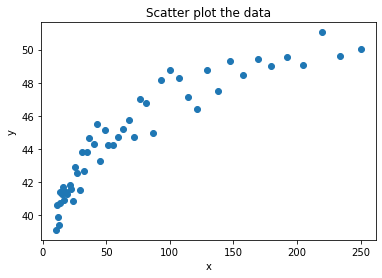

In [87]:
# Plot data
X = df.x
y = df.y

plt.scatter(X, y)
plt.title("Scatter plot the data")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

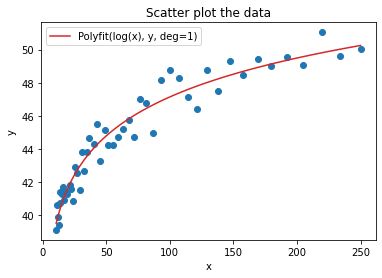

In [88]:
# Setup log(x) variable
log_x = np.log(X)

# Fit polynomial
coefs = poly.polyfit(log_x, y, deg=1)


# Generate a hundred values betwee min(x) and max(x)
x_values = np.linspace(X.min(), X.max(), num=100)

# Predict y values from generated x-values
y_pred = poly.polyval(np.log(x_values), coefs)

# Predict y-values from all the data points
y_pred_values = poly.polyval(log_x, coefs)

# Plot curve
plt.scatter(X, y)
plt.plot(x_values, y_pred, c="C3", label="Polyfit(log(x), y, deg=1)")
plt.title("Scatter plot the data")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


In [89]:
from sklearn.metrics import r2_score

# Compute RSS
def RSS(y, y_pred):
    return np.sum(np.square(np.subtract(y, y_pred)))

print("RSS score: {:.2f}".format(RSS(y, y_pred_values)))
print("R^2 ccore: {:.2f}".format(r2_score(y, y_pred_values)))

RSS score: 31.84
R^2 ccore: 0.94


With the $R^2$ score of 94%, it's a really good score nearly 100%. 

## Task 2
The second task consists of fitting a model to a set of data points that contains outliers. Here are the first five entries

The goal is to build 3 models and compare different approaches to handle outliers:

1. A linear regression to the data with outliers,
2. A huber regression to the data with outliers,
3.A linear regression to the data without outliers.
You should

- Start by using the train/test split methodology (e.g. 80-20 splits) to create a test set and keep it aside.
- Plot the training data to get a quick overview of the data.
- Build and apply a cleaning strategy to remove outliers from the training data.
- Finally compare the test MAE scores for your 3 models and comment.

Note that we don’t remove outliers from the test data. This ensures that we use the same test data each time and thus the evaluations of the models are consistent.

In [90]:
df2 = pd.read_csv("p3_task-2.csv")
df2.head()

,x1,x2,x3,y
0,7.892,318.818,162.970,2112.420
1,8.830,303.180,181.399,2096.231
2,13.811,296.231,145.849,2067.045
3,12.863,325.830,167.996,2269.262
4,13.698,254.035,171.892,1966.604


In [91]:
from sklearn.model_selection import train_test_split

X2 = df2.iloc[:, :3]
y2 = df2.y

# Splite tarin/test data
X_tr, X_te, y_tr, y_te = train_test_split(X2, y2, test_size=0.2, random_state=0)

In [92]:
X_tr.scatter()


AttributeError: 'DataFrame' object has no attribute 'scatter'

In [ ]:
X_tr.iloc[:, :1]

,x1
687,10.298
500,19.161
332,11.356
979,10.656
817,11.599
...,...
835,11.983
192,13.682
629,9.708
559,9.800


In [ ]:
y_tr.shape

(800,)

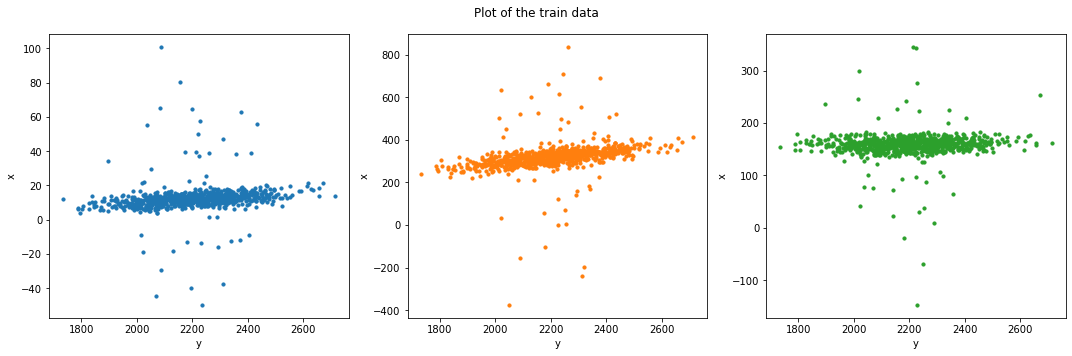

In [148]:
# Plot the data
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for n, ax in zip(range(3), axes.ravel()):
    ax.scatter(y_tr, X_tr.iloc[:, n:n +1], c="C" + str(n), s=10)
    ax.set(
        xlabel="y",
        ylabel="x"
    )

plt.suptitle("Plot of the train data")
plt.tight_layout()
plt.show()

''

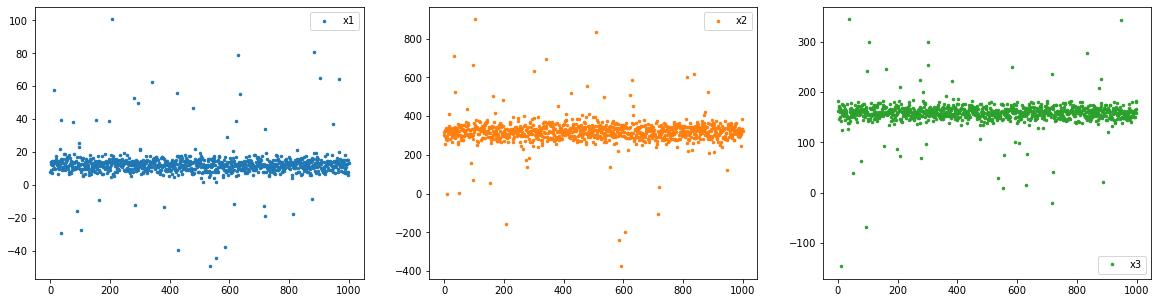

In [145]:
# Plot
df2.iloc[:, :3].plot(
    lw=0,
    marker=".",
    subplots=True,
    layout=(-1, 3),
    figsize=(20, 5),
    markersize=5
)
;

In [150]:
df2["x1"].between(0, 200)

0      True
1      True
2      True
3      True
4      True
       ... 
995    True
996    True
997    True
998    True
999    True
Name: x1, Length: 1000, dtype: bool

ValueError: x and y must be the same size

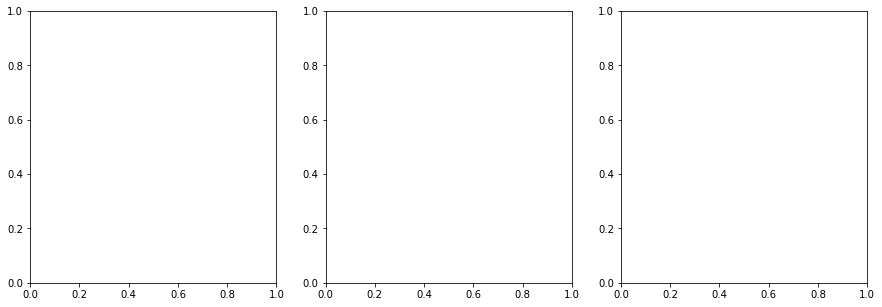

In [136]:



# Plot the data
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
a = X_tr[X_tr["x1"].between(0, 200)]

for n, ax in zip(range(3), axes.ravel()):
    ax.scatter(y_tr, a.iloc[:, n:n +1], c="C" + str(n))
    ax.set(
        xlabel="y",
        ylabel="x"
    )

plt.suptitle("Plot of the train data")
plt.tight_layout()
plt.show()
